April: **Research Questions 1.A.2** (Ideal)

# Provided with upwelling-favourable wind forcing at the surface, what are the circulation patterns during an upwelling event in Mackenzie Canyon?

Circulation inside the canyon:

What is the velocity of the onshore flows between the canyon mouth and head? **Depth slices using quivers and streamlines to identify the jet. Identify a possible y-index where the speed seems strongest. Cross-canyon cross-section of speed, u-velocity, v-velocity at identified y-index. Find an x-index where velocities are high. Time series of speed, u-velocity, v-velocity at (y-index, x-index).**

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import ticker
from matplotlib import colors
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
import quicklook
import circulation_plots

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [12]:
import importlib
importlib.reload(circulation_plots)

<module 'circulation_plots' from '/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/circulation_plots.py'>

In [3]:
fname = "1_MCKNZ_1h_20170101_201701*"
dirname = '/ocean/imachuca/Canyons/results_mackenzie/extended_domain/ideal_half/'
dep_ind = 9

In [4]:
vozocrtx, vomecrty, umask, vmask, depthu, depthv, sozotaux = quicklook.get_uv_at_depth(dirname, fname, dep_ind)

In [5]:
x_slice, y_slice, u_nstg, v_nstg, speeds = quicklook.get_speeds(vozocrtx, vomecrty, 1)

In [31]:
speeds_daily = quicklook.get_1day_avg_of_speeds(speeds, 10)
u_nstg_daily = quicklook.get_1day_avg_of_speeds(u_nstg, 10)
v_nstg_daily = quicklook.get_1day_avg_of_speeds(v_nstg, 10)

In [32]:
vozocrtx.shape, x_slice.shape, y_slice.shape, speeds_daily.shape, u_nstg_daily.shape

((360, 242, 272), (271,), (241,), (10, 241, 271), (10, 241, 271))

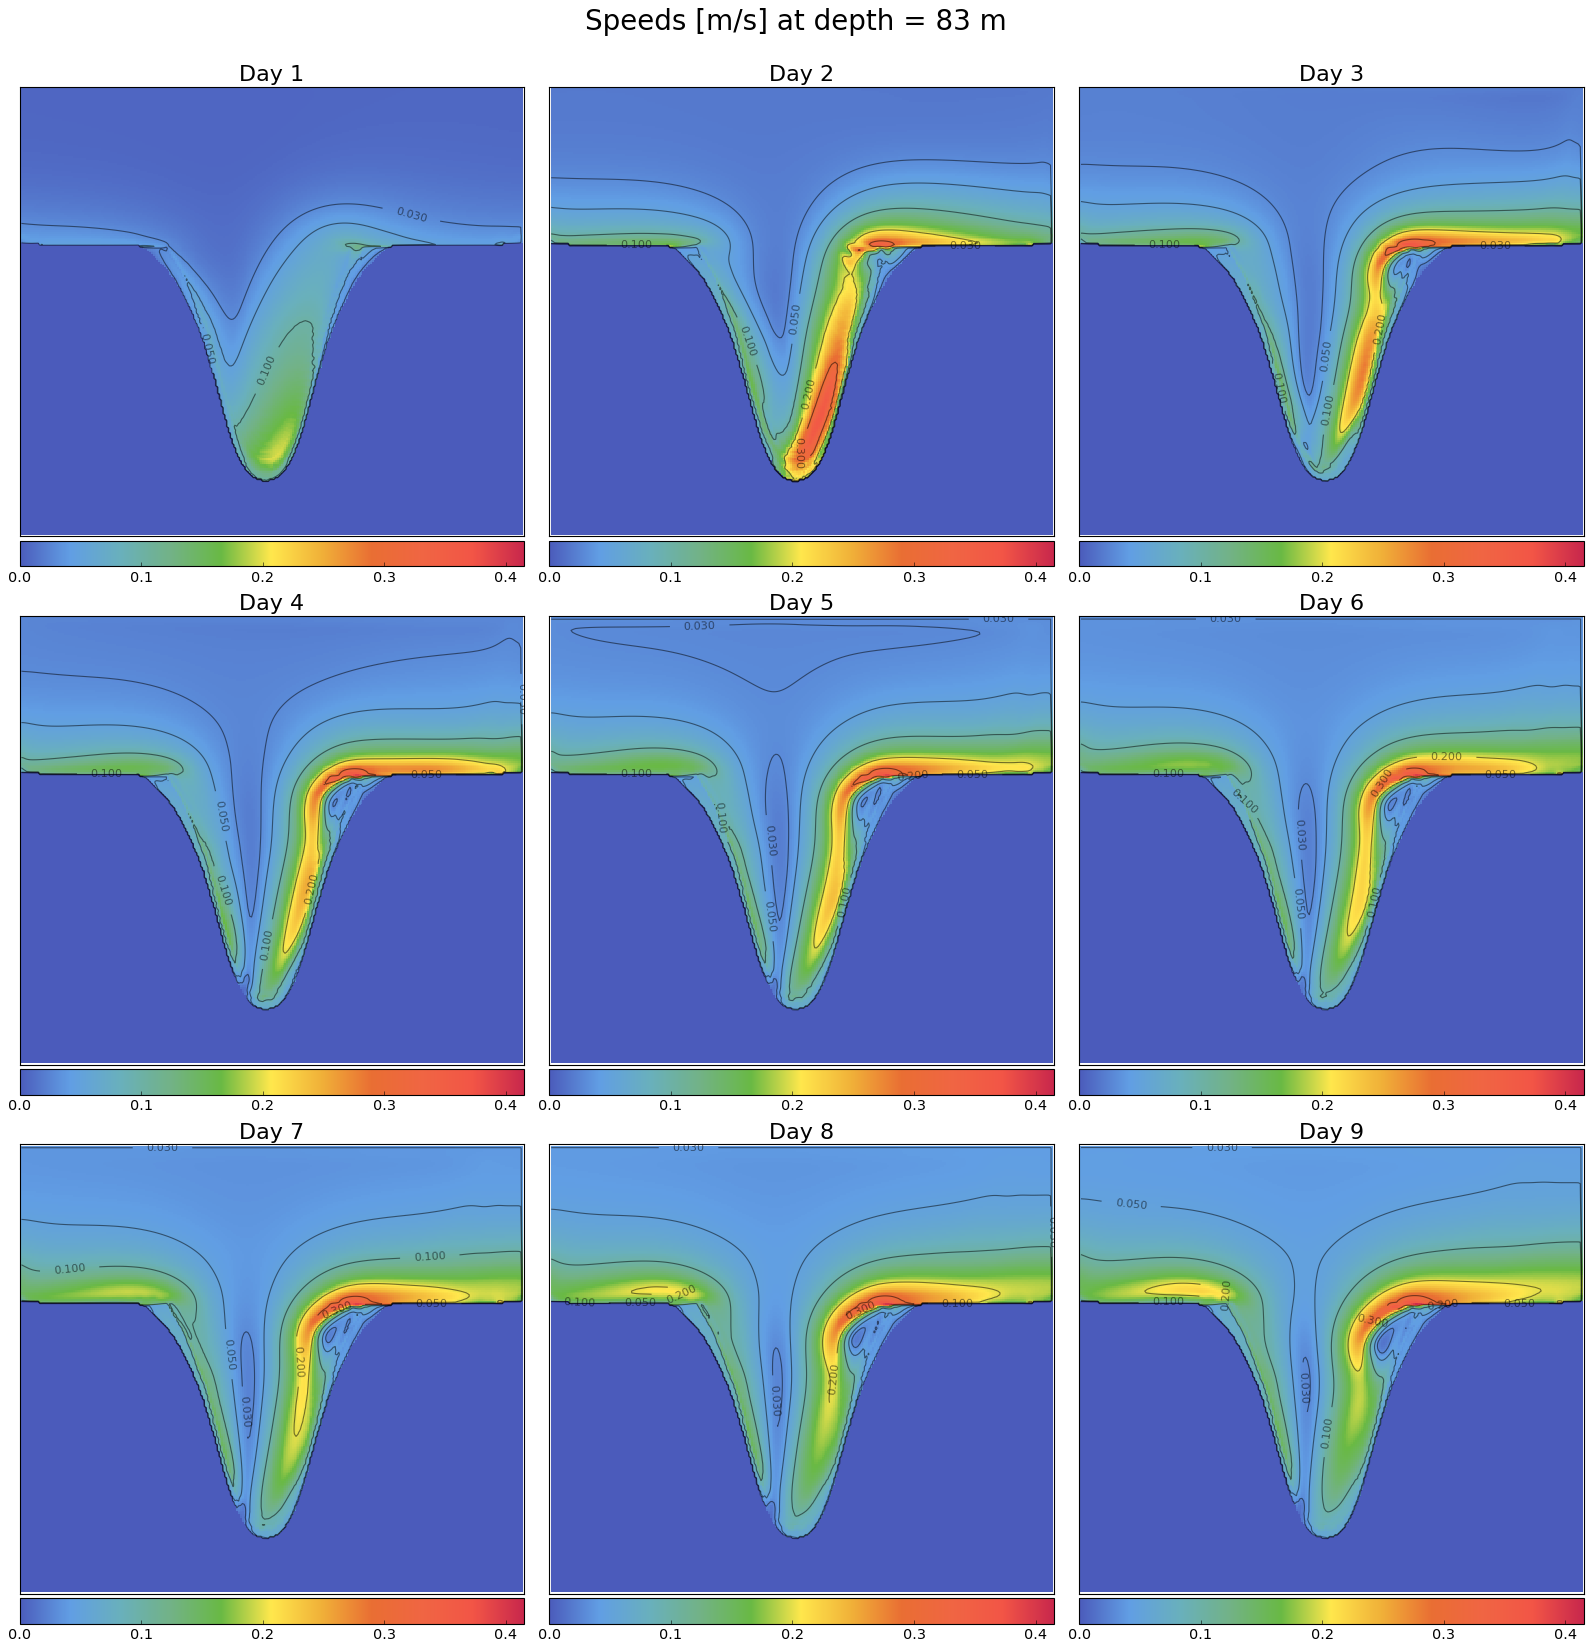

In [18]:
levels = [0.03, 0.05, 0.1, 0.2, 0.3]
fig = circulation_plots.plot_speed_pcolormesh(x_slice, y_slice, speeds_daily, umask, levels, depthu, dep_ind)

In [28]:
def plot_speed_quiver(x_slice, y_slice, u_nstg_daily, v_nstg_daily, speeds_daily, umask, levels, depthu, dep_ind):
    ''' Other functions used to set up this process:
    quicklook.get_uv_at_depth
    quicklook.get_speeds
    quicklook.get_1day_avg_of_speeds
    '''

    cmap = cm.Blues
    cmap.set_bad('wheat')
    vmin, vmax = 0, speeds_daily.max()

    fig, axes = plt.subplots(3, 3, figsize = (20, 21))
    for ax, n in zip(axes.flatten(), np.arange(9)):
        plot_speeds = speeds_daily[n, ...]
        plot_u_nstg = u_nstg_daily[n, ...]
        plot_v_nstg = v_nstg_daily[n, ...]
        ax.quiver(x_slice, y_slice, plot_u_nstg, plot_v_nstg, color='k', 
                  clim=[vmin,vmax], pivot='mid', width=0.005, headwidth=2.5, zorder=3)
        p = ax.pcolormesh(x_slice, y_slice, plot_speeds, zorder=2, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_aspect(aspect='equal')
        ax.set_xlim([0, umask.shape[-1]])
        ax.set_ylim([0, umask.shape[-2]])
        ax.set_title('Day ' + str(n+1), fontsize=20)
        cbar = fig.colorbar(p, ax=ax, fraction=0.05, orientation='horizontal', pad=0.009)
        cbar.ax.tick_params(labelsize=13)
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbar.locator = tick_locator
        cbar.update_ticks()

    fig.tight_layout(w_pad=1.2, h_pad=0.01)
    fig.suptitle('Speeds [m/s] at depth = '+str(int(depthu[dep_ind]))+' m', fontsize=25)
    plt.subplots_adjust(top=0.96)
    return fig


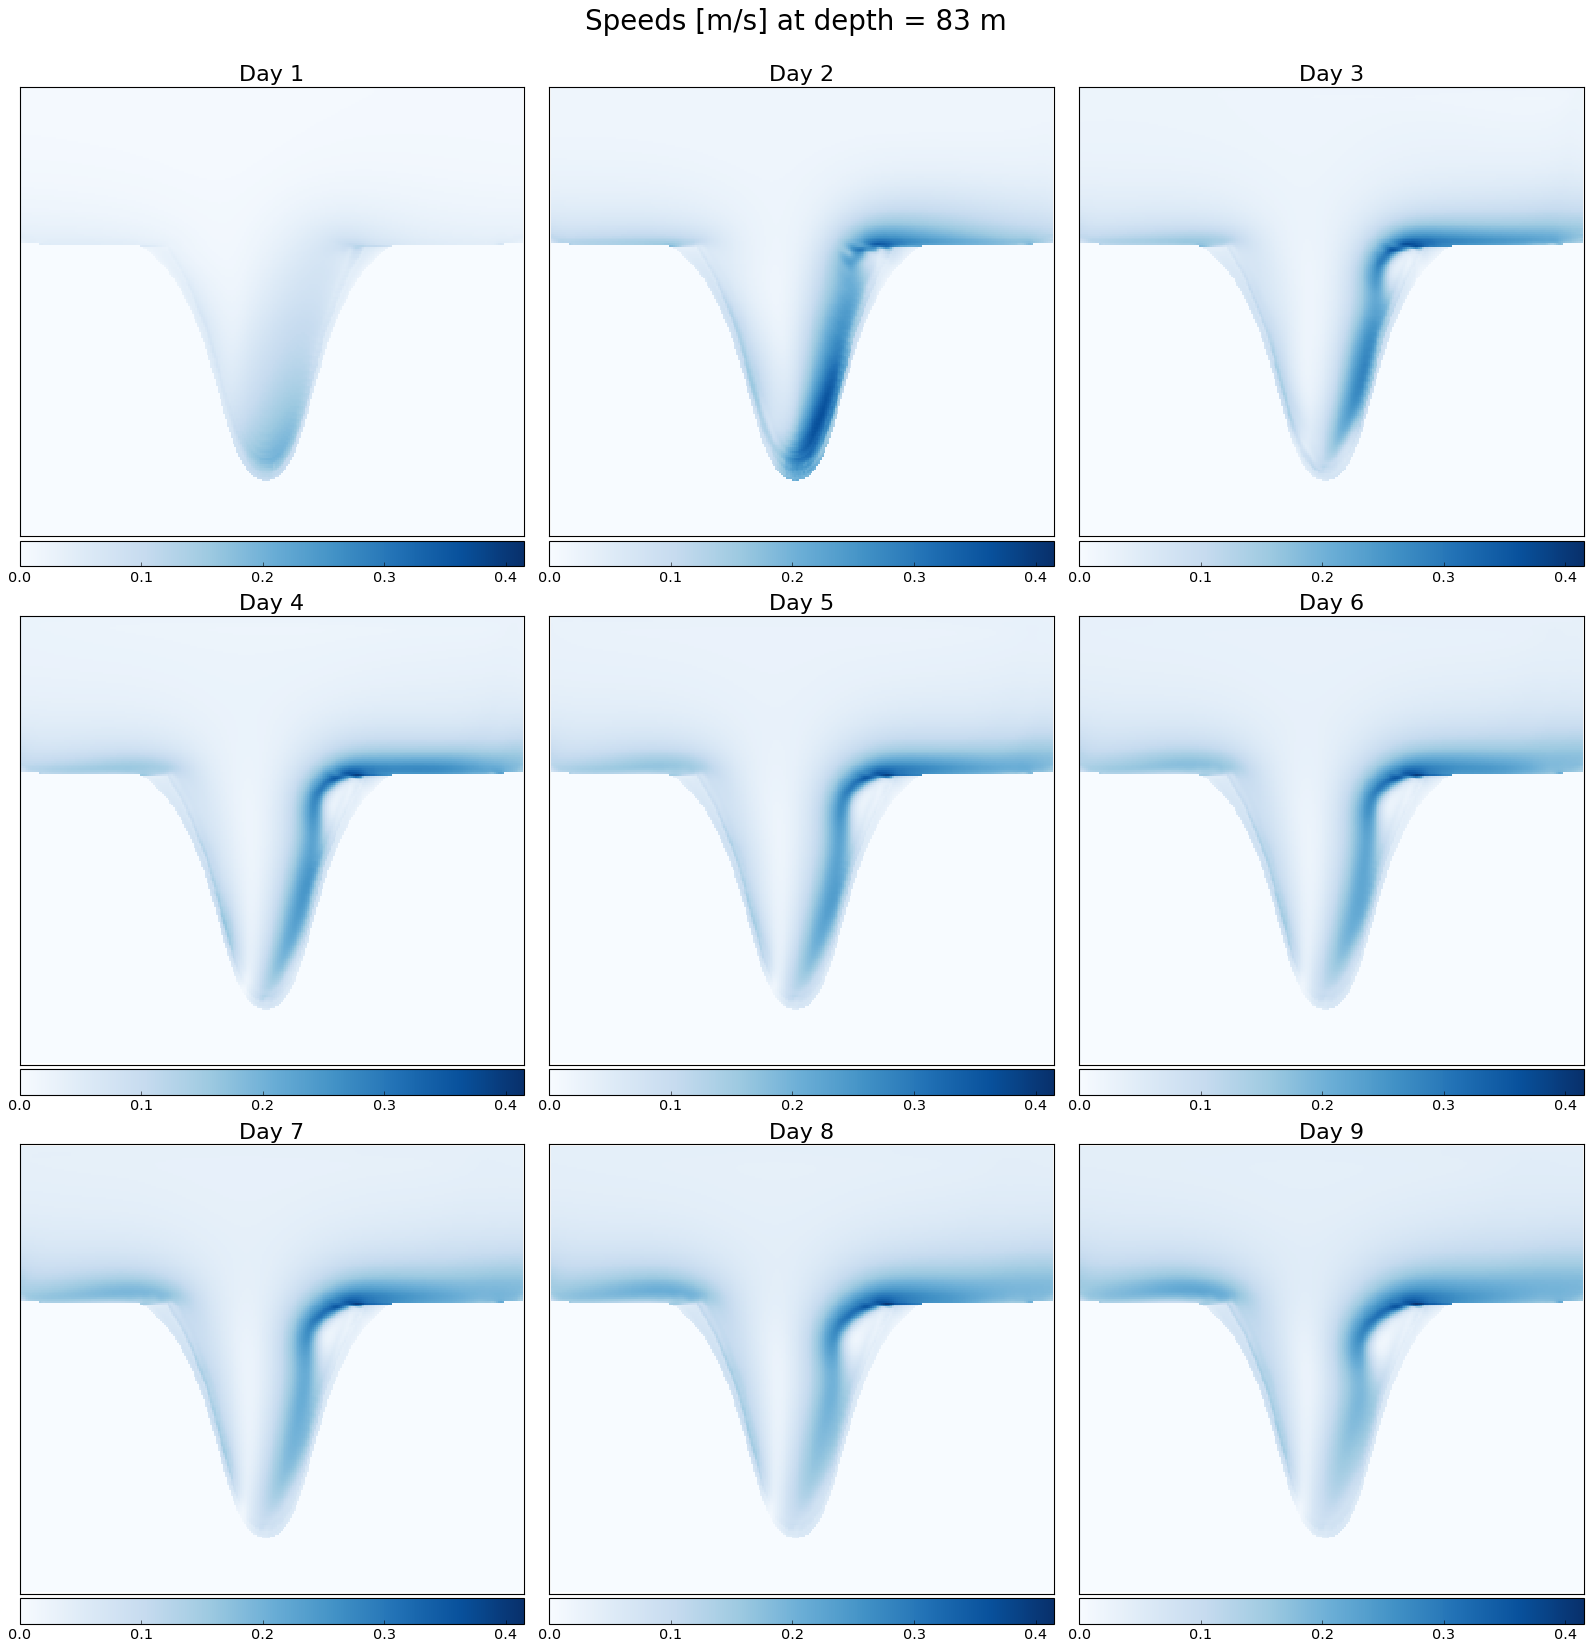

In [29]:
fig = plot_speed_quiver(x_slice, y_slice, u_nstg, v_nstg, speeds, umask, levels, depthu, dep_ind)